In [1]:
%cd ../

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
%matplotlib inline

In [5]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                      mask='data/pieman_data/wholebrain.nii.gz')

In [6]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(mini_pieman.all()), num_factors=100,
                                                  mask='data/pieman_data/wholebrain.nii.gz')

05/19/2020 12:51:56 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/19/2020 12:51:58 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)
05/19/2020 12:52:00 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None, zscore_by_rest=False)


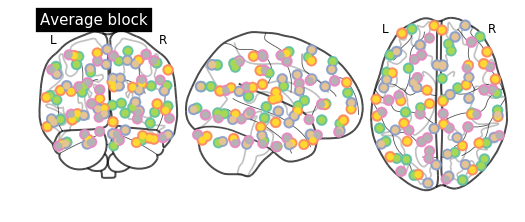

In [7]:
htfa.plot_factor_centers()

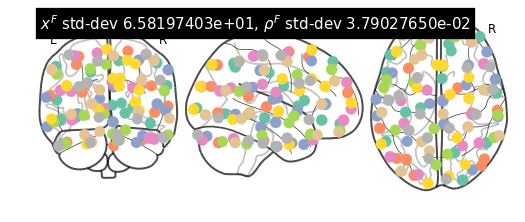

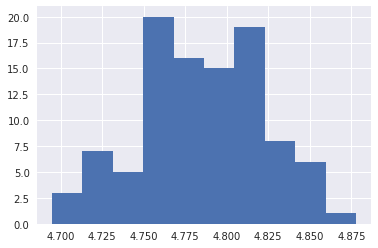

(<nilearn.plotting.displays.OrthoProjector at 0x7f5a5039b3c8>,
 tensor([[-55.0226, -55.5857,  45.2817],
         [  4.2745,  10.5613,   4.5752],
         [-34.2963, -24.7889,  -8.2418],
         [ 17.6476, -67.1340,  -3.7585],
         [ 50.9112, -57.0367,  49.1925],
         [-54.2125,  17.1714,  10.0824],
         [ 44.0629,  54.5832, -14.2510],
         [-50.3438,  35.3672, -10.4819],
         [ 25.7291, -96.1254,   2.0608],
         [ 61.6318,  -4.6563,  25.2950],
         [-18.5268, -19.8995,  39.1852],
         [ 13.7690,  39.7504,   6.6727],
         [ 10.9368,  47.0918,  51.2050],
         [  5.6702, -11.5430, -38.2411],
         [ 20.6193,   0.8510,  61.5083],
         [-43.5494, -73.3580, -34.3209],
         [ 62.5497, -22.8625,   3.5031],
         [-33.4037, -74.6078,  47.5056],
         [-27.5204,  62.6938,  18.3069],
         [ 45.2487, -81.2587,  24.9123],
         [-61.5374, -41.6830,  14.5134],
         [-25.2598, -91.1582,  24.7213],
         [ 35.5980, -25.6390, -32.0

In [8]:
htfa.visualize_factor_template()

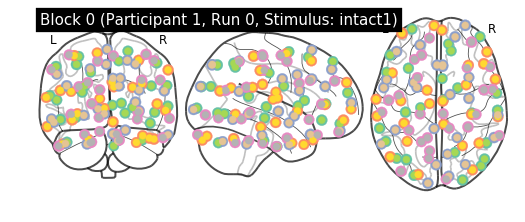

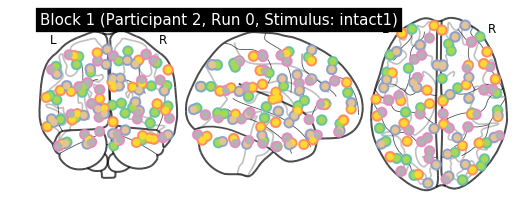

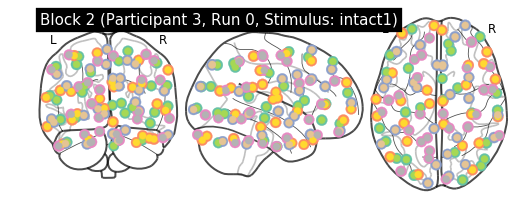

In [9]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)

In [10]:
losses = htfa.train(num_steps=1000, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    batch_size=128, use_cuda=True, blocks_batch_size=8)

05/19/2020 12:54:18 [Epoch 1] (1284ms) Posterior free-energy 5.02914099e+09
05/19/2020 12:54:19 [Epoch 2] (993ms) Posterior free-energy 4.40119194e+09
05/19/2020 12:54:20 [Epoch 3] (910ms) Posterior free-energy 4.11080960e+09
05/19/2020 12:54:21 [Epoch 4] (919ms) Posterior free-energy 4.00976077e+09
05/19/2020 12:54:22 [Epoch 5] (935ms) Posterior free-energy 3.86705459e+09
05/19/2020 12:54:23 [Epoch 6] (1009ms) Posterior free-energy 3.83956582e+09
05/19/2020 12:54:24 [Epoch 7] (1025ms) Posterior free-energy 3.79887693e+09
05/19/2020 12:54:25 [Epoch 8] (934ms) Posterior free-energy 3.76052992e+09
05/19/2020 12:54:26 [Epoch 9] (962ms) Posterior free-energy 3.73910067e+09
05/19/2020 12:54:27 [Epoch 10] (977ms) Posterior free-energy 3.79382170e+09
05/19/2020 12:54:28 [Epoch 11] (1087ms) Posterior free-energy 3.68734464e+09
05/19/2020 12:54:29 [Epoch 12] (1155ms) Posterior free-energy 3.63908403e+09
05/19/2020 12:54:30 [Epoch 13] (1045ms) Posterior free-energy 3.58950861e+09
05/19/2020 12:5

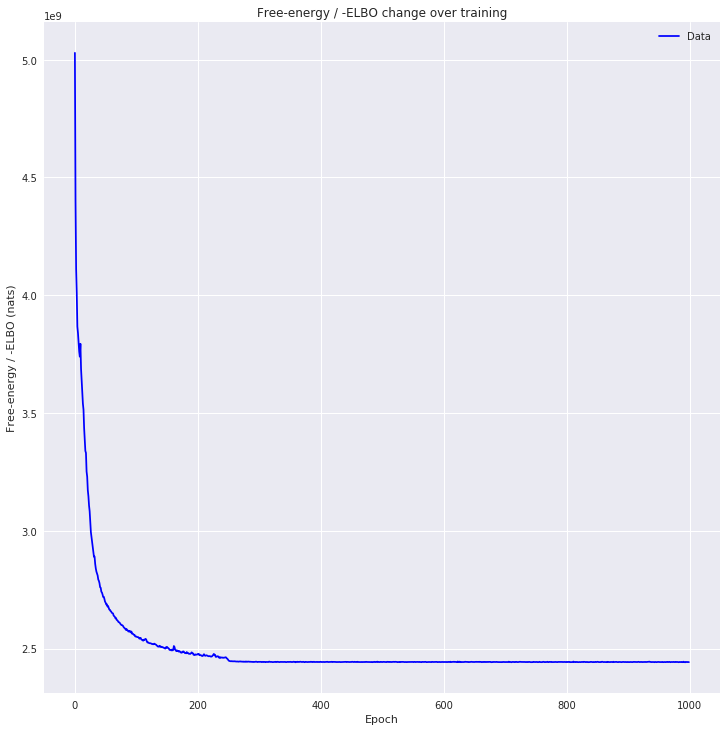

In [11]:
utils.plot_losses(losses)

In [12]:
htfa.normalize_activations()

[tensor(10.8725), tensor(8.5388), tensor(9.7904)]

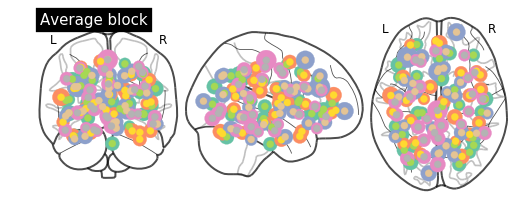

In [13]:
htfa.plot_factor_centers()

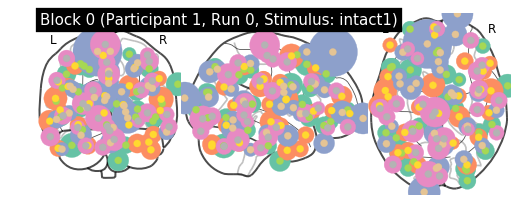

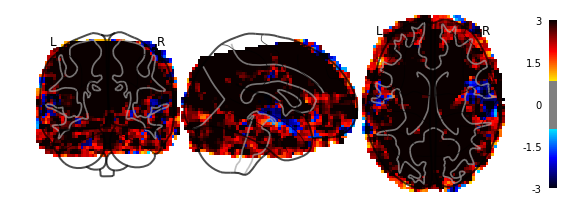

05/19/2020 13:11:14 Reconstruction Error (Frobenius Norm): 9.20713574e+03 out of 5.08479834e+03


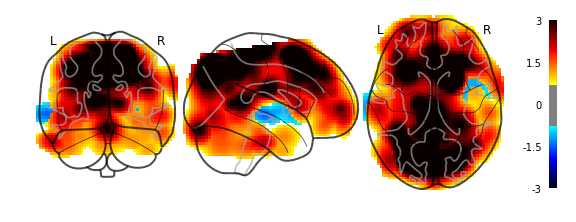

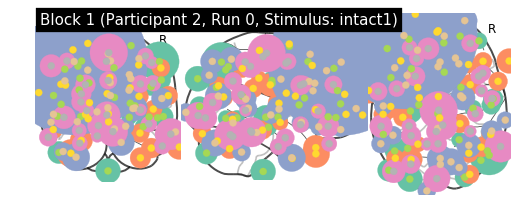

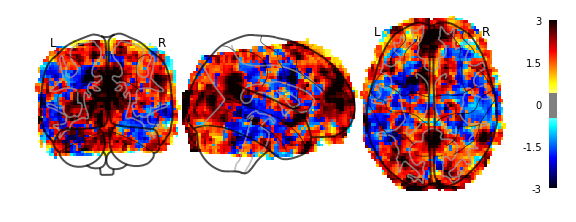

05/19/2020 13:11:47 Reconstruction Error (Frobenius Norm): 6.06541016e+03 out of 5.19533984e+03


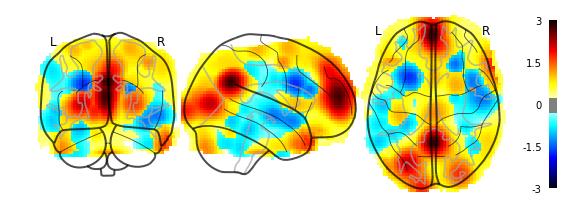

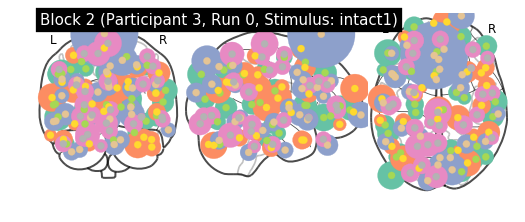

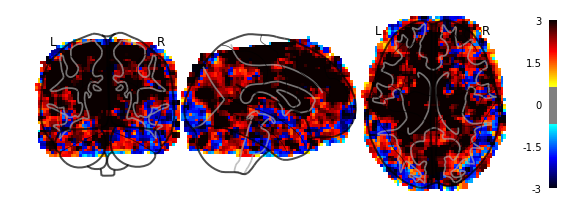

05/19/2020 13:12:21 Reconstruction Error (Frobenius Norm): 7.14061621e+03 out of 5.19534082e+03


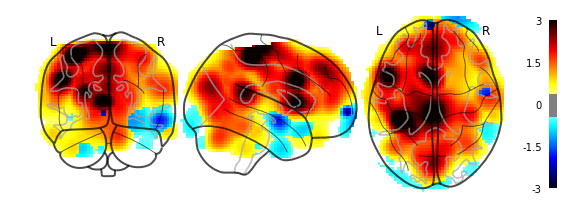

In [14]:
for b in range(htfa.num_blocks):
    htfa.plot_factor_centers(block=b)
    htfa.plot_original_brain(block=b)
    htfa.plot_reconstruction(block=b)

In [15]:
htfa.results(0)

{'factor_centers': tensor([[ -43.9929,  -51.7123,   37.1923],
         [   8.7028,   14.9368,    6.0153],
         [ -27.1731,  -42.4173,  -21.1146],
         [  28.8124,  -84.2346,   -7.9385],
         [  43.0109,  -46.4402,   42.8692],
         [ -48.3219,   23.2261,   22.6889],
         [  46.9797,   44.8081,  -12.1252],
         [ -50.1062,   22.1901,   -7.7022],
         [  30.7418,  -96.8615,    0.4610],
         [  73.1455,    2.9597,   26.6345],
         [ -19.9431,  -39.2766,   42.1586],
         [  -1.6672,   37.6993,  -16.1850],
         [   0.3778,   40.0536,   38.2296],
         [  10.4534,   -8.5986,  -53.5157],
         [  22.1428,    9.4435,   58.2347],
         [ -38.3483,  -67.7123,  -37.6869],
         [  56.6196,  -37.6929,    6.3529],
         [ -25.4699,  -76.8654,   45.7787],
         [ -29.4730,   62.5976,    0.2038],
         [  29.8764,  -85.6850,   18.7639],
         [ -54.8150,  -46.4667,    8.7663],
         [ -31.5677,  -83.5108,   18.6817],
         [  18

In [18]:
htfa.average_reconstruction_error(weighted=False)

05/19/2020 14:04:09 Average reconstruction error (MSE): 4.11754354e+03 +/- 1.16739994e+02
05/19/2020 14:04:09 Average data norm (Euclidean): 5.15849300e+03 +/- 5.21099949e+01
05/19/2020 14:04:09 Percent average reconstruction error: 79.825664 +/- 2.27942423e+00


(array([4094.54614258, 3987.45947266, 4270.625     ]),
 array([5084.79833984, 5195.33984375, 5195.34082031]),
 array([0.80525241, 0.76750696, 0.82201056]))

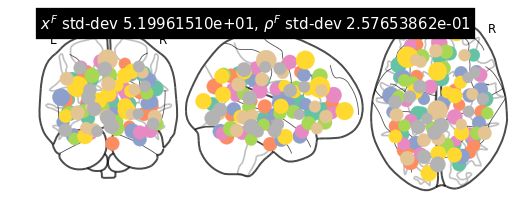

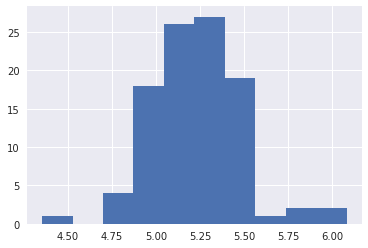

(<nilearn.plotting.displays.OrthoProjector at 0x7f5a1d63d908>,
 tensor([[-37.7796, -48.3048,  32.0100],
         [  3.5142,  10.5745,   8.2239],
         [-21.4679, -25.7206,  -8.9439],
         [ 17.1442, -58.9481,  -1.2798],
         [ 36.5454, -51.7732,  37.6399],
         [-41.1873,  11.8748,  10.5782],
         [ 37.1836,  35.2660,  -4.4412],
         [-41.4397,  24.8067,  -3.7285],
         [ 22.1242, -79.6148,   6.2241],
         [ 49.6874, -10.9085,  22.0116],
         [-16.8764, -25.4445,  30.7587],
         [ 12.1257,  37.3034,   0.9018],
         [  1.4795,  31.5105,  33.1572],
         [  4.2335, -18.8148, -35.7812],
         [ 17.4403,  -1.2802,  48.0668],
         [-35.5317, -64.7090, -28.0604],
         [ 45.5801, -24.5358,   3.9705],
         [-25.5256, -60.0838,  36.0395],
         [-22.5273,  46.3856,   7.3495],
         [ 33.1184, -67.0675,  17.6476],
         [-44.4569, -39.6107,   9.5902],
         [-28.9939, -77.4586,  24.9150],
         [ 22.1249, -17.1264, -17.8

In [17]:
htfa.visualize_factor_template()